# Ejercicio 4: Modelo Probabilístico- Parte 02

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Nombre: Michael Perugachi                                                                            
## Grupo: GR1CC


## Parte 0: Carga del Corpus

In [16]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

In [17]:
# Mostramos del corpus
print("Número total de documentos en el corpus:", len(newsgroupsdocs))
print("\nEjemplo de documento:")
print(newsgroupsdocs[0][:800]) # primeros 800 caracteres del primer documento

Número total de documentos en el corpus: 18846

Ejemplo de documento:


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [18]:
import pandas as pd
df = pd.DataFrame(newsgroupsdocs)
df

,0
0,\n\nI am sure some bashers of Pens fans are pr...
1,My brother is in the market for a high-perform...
2,\n\n\n\n\tFinally you said what you dream abou...
3,\nThink!\n\nIt's the SCSI card doing the DMA t...
4,1) I have an old Jasmine drive which I cann...
...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
18842,\nNot in isolated ground recepticles (usually ...
18843,I just installed a DX2-66 CPU in a clone mothe...
18844,\nWouldn't this require a hyper-sphere. In 3-...


In [22]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Descargar recursos de NLTK (solo la primera vez)
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess(doc):
    # 1. Eliminar etiquetas HTML
    doc = re.sub(r"<.*?>", " ", doc)

    # 2. Eliminar caracteres no alfabéticos
    doc = re.sub(r"[^a-zA-Z\s]", " ", doc)

    # 3. Eliminar espacios múltiples
    doc = re.sub(r"\s+", " ", doc).strip()

    # 4. Normalizar a minúsculas
    doc = doc.lower()

    # 5. Tokenizar
    tokens = word_tokenize(doc)

    # 6. Eliminar stopwords
    tokens = [t for t in tokens if t not in stop_words]

    # 7. Stemming
    tokens = [stemmer.stem(t) for t in tokens]

    return tokens


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [23]:
# Renombramos la Columna
df = df.rename(columns={0: "review"})

In [31]:
#Aplicamos preprocesamiento
df["prep"] = df["review"].apply(preprocess)

In [32]:
df

,review,prep
0,\n\nI am sure some bashers of Pens fans are pr...,"[sure, basher, pen, fan, pretti, confus, lack,..."
1,My brother is in the market for a high-perform...,"[brother, market, high, perform, video, card, ..."
2,\n\n\n\n\tFinally you said what you dream abou...,"[final, said, dream, mediterranean, new, area,..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,"[think, scsi, card, dma, transfer, disk, scsi,..."
4,1) I have an old Jasmine drive which I cann...,"[old, jasmin, drive, use, new, system, underst..."
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,"[dn, nyeda, cnsvax, uwec, edu, david, nye, dn,..."
18842,\nNot in isolated ground recepticles (usually ...,"[isol, ground, recepticl, usual, unusu, color,..."
18843,I just installed a DX2-66 CPU in a clone mothe...,"[instal, dx, cpu, clone, motherboard, tri, mou..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,"[requir, hyper, sphere, space, point, specifi,..."


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [ ]:
# Convertir las listas de tokens a textos unificados (un solo string)

In [34]:
df['prep_list'] = df['prep'].apply(lambda tokens: " ".join(tokens))


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['prep_list'])

In [36]:
query = 'government'
q_proc = preprocess(query)
q_vec = vectorizer.transform([query])

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

df['q_sim'] = cosine_similarity(X, q_vec)
df.sort_values(by='q_sim', ascending=False)

,review,prep,prep_list,q_sim
11571,\nOr perhaps it's because they think that all ...,"[perhap, think, government, bodi, busi, suppre...",perhap think government bodi busi suppress bel...,0.344138
7593,"\nAgreed. Remember, I don't even think of Cli...","[agre, rememb, even, think, clipper, encrypt, ...",agre rememb even think clipper encrypt real se...,0.272278
2581,I would guess that they won't use Clip...,"[would, guess, use, clipper, use, stu, iii, am...",would guess use clipper use stu iii amoung gov...,0.264099
12952,Commericial support for exploration examples:\...,"[commerici, support, explor, exampl, also, muc...",commerici support explor exampl also much bara...,0.226939
18313,"\n\nActually, this is incorrect. French resis...","[actual, incorrect, french, resist, may, play,...",actual incorrect french resist may play part h...,0.192776
...,...,...,...,...
6285,WOW !!!!\nDid I discover a great BBS !!\nIt's ...,"[wow, discov, great, bb, call, sovereignti, li...",wow discov great bb call sovereignti lie peopl...,0.000000
6284,"\n\nI saw this a few years ago on ""Tomorrow's ...","[saw, year, ago, tomorrow, world, low, brow, b...",saw year ago tomorrow world low brow bbc techn...,0.000000
6283,cica.indiana.edu pc/drivers the current versi...,"[cica, indiana, edu, pc, driver, current, vers...",cica indiana edu pc driver current version,0.000000
6282,I am looking for a program that is capable of ...,"[look, program, capabl, display, graph, node, ...",look program capabl display graph node link po...,0.000000


## Parte 3: Ranking con BM25

### Actividad

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

Algoritmo BM25:

1. Tokenización
2. Calcular longitudes de documentos y promedio de longitud
3. Calcular TF (frecuencia de término por documento)
4. Calcular DF (document frequency) e IDF de BM25
5. Definir los parámetros de BM25 (k1, b)
6. Implementar la función de score BM25 para un documento
7. Función para calcular la probabilidad para todos los documentos de la colección a partir de una query
8. Recuperar los documentos mejor puntuados (ranking)

In [69]:
# Tokenizacion
df['prep']

,prep
0,"[sure, basher, pen, fan, pretti, confus, lack,..."
1,"[brother, market, high, perform, video, card, ..."
2,"[final, said, dream, mediterranean, new, area,..."
3,"[think, scsi, card, dma, transfer, disk, scsi,..."
4,"[old, jasmin, drive, use, new, system, underst..."
...,...
18841,"[dn, nyeda, cnsvax, uwec, edu, david, nye, dn,..."
18842,"[isol, ground, recepticl, usual, unusu, color,..."
18843,"[instal, dx, cpu, clone, motherboard, tri, mou..."
18844,"[requir, hyper, sphere, space, point, specifi,..."


In [70]:
#Calcular longitudes de documento y longitud promedio
docs = df['prep']
doc_lengths = docs.apply(len)
avgdl = doc_lengths.mean()


In [71]:
# Calcular TF
from collections import Counter

tf = [Counter(doc) for doc in docs]


In [72]:
# Calcular DF
import math

df_counts = Counter()

for doc in docs:
    df_counts.update(set(doc))   # solo cuenta 1 por documento


In [73]:
# Calcular IDF de BM25
N = len(docs)

idf = {}

for term, freq in df_counts.items():
    idf[term] = math.log((N - freq + 0.5) / (freq + 0.5) + 1)


In [74]:
# Parametros BM25
k1 = 1.5
b = 0.75


In [75]:
# Implementar la función de score BM25 para un documento
def bm25_score(query_tokens, index):
    score = 0
    dl = doc_lengths.iloc[index]
    tf_doc = tf[index]
    for term in query_tokens:
        if term in tf_doc:
            freq = tf_doc[term]
            numerator = idf.get(term, 0) * freq * (k1 + 1)
            denominator = freq + k1 * (1 - b + b * dl / avgdl)
            score += numerator / denominator
    return score


In [76]:
# Función para calcular la probabilidad para todos los documentos de la colección a partir de una query
def bm25_all(query_tokens):
    scores = []
    for i in range(N):
        scores.append(bm25_score(query_tokens, i))
    return scores


In [77]:
# usamos la misma query que antes
query = "government"
q_proc = preprocess(query)


In [80]:
# Agregamos los scores al DataFrame y Rankeamos
df['bm25'] = bm25_all(q_proc)
ranking_bm25 = df.sort_values(by='bm25', ascending=False)
ranking_bm25


,review,prep,prep_list,q_sim,bm25
5905,\tYou have underlined here the battle that mus...,"[underlin, battl, must, fought, battl, heart, ...",underlin battl must fought battl heart mind am...,0.0,6.301898
395,\n\nEither the government has force available ...,"[either, govern, forc, avail, libertarian, pos...",either govern forc avail libertarian posit gov...,0.0,6.125580
14176,\n[...]\n\n\nYou seem to be saying that a LIMI...,"[seem, say, limit, govern, provid, opportun, p...",seem say limit govern provid opportun privat i...,0.0,6.065975
7270,\nAgreed. \n\n\nIt is a failure of libertaria...,"[agre, failur, libertarian, ideolog, provid, r...",agre failur libertarian ideolog provid reason ...,0.0,6.060993
17069,\n\nThe easiest way is a user fee for each cli...,"[easiest, way, user, fee, clipper, chip, manuf...",easiest way user fee clipper chip manufactur m...,0.0,6.035205
...,...,...,...,...,...
6445,Besides being an infringement on our civil lib...,"[besid, infring, civil, liberti, subject, post...",besid infring civil liberti subject post name ...,0.0,0.000000
6444,"Hello src readers,\n\nAgain the misconception ...","[hello, src, reader, misconcept, copt, among, ...",hello src reader misconcept copt among orient ...,0.0,0.000000
6443,Does anybody know what Delaunay Triangulation ...,"[anybodi, know, delaunay, triangul, refer, use...",anybodi know delaunay triangul refer use creat...,0.0,0.000000
6442,"\n\n\nCorrect, we have no parallax measurement...","[correct, parallax, measur, burst, therefor, t...",correct parallax measur burst therefor tell wh...,0.0,0.000000


In [86]:
# Comparacion BM25 vs TF-IDF
# Comparamos los mejores documentos por cada metodo
print("Top TF-IDF:")
print(df.sort_values('q_sim', ascending=False).head(10))

print("\nTop BM25:")
print(df.sort_values('bm25', ascending=False).head(10))


Top TF-IDF:
                                                  review  \
11571  \nOr perhaps it's because they think that all ...   
7593   \nAgreed.  Remember, I don't even think of Cli...   
2581           I would guess that they won't use Clip...   
12952  Commericial support for exploration examples:\...   
18313  \n\nActually, this is incorrect.  French resis...   
709    Will there be no chance to get the Author of t...   
2640   \n\n\nThere is one point I'd like to make, tha...   
9189   According to BBC Radio this morning, UK, Denma...   
5248   \n\nPerhaps you've been under a rock since, sa...   
6070   \n\n\n\n\nWell, regardless of what policy liab...   

                                                    prep  \
11571  [perhap, think, government, bodi, busi, suppre...   
7593   [agre, rememb, even, think, clipper, encrypt, ...   
2581   [would, guess, use, clipper, use, stu, iii, am...   
12952  [commerici, support, explor, exampl, also, muc...   
18313  [actual, incorrect, 

## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. **Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?**
Como se observa en la Grafica BM25 asigna scores mas altos a los documentos relevantes, encambio TF-IDF produce valores muy bajos, incluso para los documentos mejor puntuados.  
4. **Sugiere: ¿A qué se podría deber esta diferencia?**
Esto se debe a las diferencias de ambos modelos, BM25 considera la frecuencia del termino dentro del documento tomando en cuenta la longitud del mismo. Por otro lado en TF-IDF el score queda muy bajo si la palabra aparece pocas veces o esta dispersa.


<Figure size 1200x600 with 0 Axes>

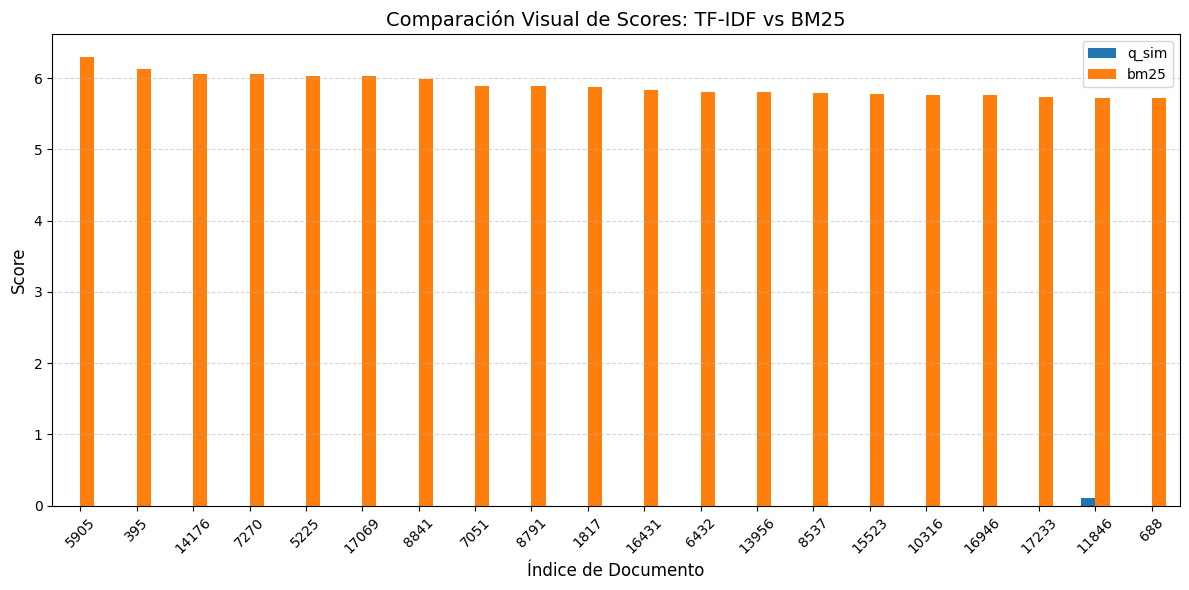

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar los 20 documentos más relevantes según BM25
top_n = 20
df_plot = df.nlargest(top_n, 'bm25')[['q_sim', 'bm25']]

# Gráfico de barras
plt.figure(figsize=(12, 6))
df_plot.plot(kind='bar', figsize=(12,6))
plt.title("Comparación Visual de Scores: TF-IDF vs BM25", fontsize=14)
plt.xlabel("Índice de Documento", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Parte 5: Evaluación con consulta relevante

### Actividad

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [136]:
# Definimos la consulta y los documentos relevantes
query = "government"
relevant_docs = df_scores.nlargest(100, 'bm25')['doc_index'].tolist()
print("Documentos relevantes:", relevant_docs)

Documentos relevantes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [139]:
# Funcion precision @3
def precision_at_k(ranked_list, relevant_docs, k=3):
    """Calcula Precision@k"""
    top_k = ranked_list[:k]
    hits = sum([1 for doc in top_k if doc in relevant_docs])
    return hits / k

In [140]:
# Funcion Average Precision
def average_precision(ranked_list, relevant_docs):
    """Calcula Average Precision (AP)"""
    hits = 0
    sum_precisions = 0
    for i, doc in enumerate(ranked_list, 1):
        if doc in relevant_docs:
            hits += 1
            sum_precisions += hits / i
    return sum_precisions / len(relevant_docs)

In [141]:
# Obtenemos el ranking TF-IDF y BM25
ranking_tfidf = df_scores.sort_values("q_sim", ascending=False)["doc_index"].tolist()
ranking_bm25 = df_scores.sort_values("bm25", ascending=False)["doc_index"].tolist()


In [142]:
# Calculo de metricas para TF-IDF
p3_tfidf = precision_at_k(ranking_tfidf, relevant_docs, k=3)
map_tfidf = average_precision(ranking_tfidf, relevant_docs)

In [143]:
# Calculo de metricas para BM25
p3_bm25 = precision_at_k(ranking_bm25, relevant_docs, k=3)
map_bm25 = average_precision(ranking_bm25, relevant_docs)

In [144]:
#Mostramos los resultados
print("\n=== RESULTADOS DE EVALUACIÓN ===")
print(f"Precision@3 (TF-IDF): {p3_tfidf:.4f}")
print(f"Precision@3 (BM25):   {p3_bm25:.4f}")

print(f"\nMAP (TF-IDF): {map_tfidf:.4f}")
print(f"MAP (BM25):   {map_bm25:.4f}")


=== RESULTADOS DE EVALUACIÓN ===
Precision@3 (TF-IDF): 0.0000
Precision@3 (BM25):   0.6667

MAP (TF-IDF): 0.0041
MAP (BM25):   0.6010


**3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?**

Como se puede observar en los resultados el modelo BM25 supera al modelo TF-IDF, ya que, BM25 logra recuperar documentos relevantes dentro de las primeras posiciones, mientras que TF-IDF no recupera ninguo en el Top-3 y su precision promedio es casi nula